In [1]:
# Importing Modules
import matplotlib
import re
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.stats import kde

In [2]:
# Setting up file variables used throughout the program
file = "5kkk.pdb"
atom_file = "atomfile.txt"
hetero_file = "heterofile.txt"
atom_hetero_file = "atomheterofile.txt"

The retrieve() function below takes in a file name and a list of fields as strings. The names for each of the fields matches the official names for the .pdb format. For example:
<br>
<br>
<centre>
    <b>retrieve("examplefile.txt", ['atom', 'serial', 'x, 'y', 'z'])</b>
</centre>

In [3]:
def retrieve(filename, fields):
    '''
    in: name of file and a list of fields as strings. 
    out: list of fields from file
    '''
    output = []                                   # Initialise output list
    
    if 'atom' in fields:
        atomField = []                            # Initialise empty list for atom entries
        with open(filename,'r') as infile:        # Open file
            for line in infile:                   # Iterate through lines
                parsed_line = line[0:7].strip()   # Retrieve the 'atom' entry in each line and remove whitespace
                atomField.append(parsed_line)     # Append to the 'atomField' list
        output.append(atomField)                  # Append 'atomField' to the output list
        
    if 'serial' in fields:
        serialField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = int(line[7:11].strip())  # Converted to int
                serialField.append(parsed_line)
        output.append(serialField)
        
    if 'name' in fields:
        nameField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[11:16].strip()
                nameField.append(parsed_line)
        output.append(nameField)
    
    if 'altLoc' in fields:
        altLocField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = int(line[16:17].strip())
                altLocField.append(parsed_line)
        output.append(altLocField)
    
    if 'resName' in fields:
        resNameField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[17:20].strip()
                resNameField.append(parsed_line)
        output.append(resNameField)
    
    if 'chainID' in fields:
        chainIDField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[21:22].strip()
                chainIDField.append(parsed_line)
        output.append(chainIDField)
        
    if 'resSeq' in fields:
        resSeqField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = int(line[22:26].strip())
                resSeqField.append(parsed_line)
        output.append(resSeqField)
    
    if 'insertionCode' in fields:
        serialfield = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[26:27].strip()
                insertionCodeField.append(parsed_line)
        output.append(insertionCodeField)
    
    if 'x' in fields:
        xField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[30:38].strip())
                xField.append(parsed_line)
        output.append(xField)
        
    if 'y' in fields:
        yField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[38:46].strip())
                yField.append(parsed_line)
        output.append(yField)
        
    if 'z' in fields:
        zField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[46:54].strip())
                zField.append(parsed_line)
        output.append(zField)
    
    if 'occupancy' in fields:
        ocupancyField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[54:60].strip())
                occupancyField.append(parsed_line)
        output.append(occupancyField)
    
    if 'tempFactor' in fields:
        tempFactorField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = float(line[60:66].strip())
                tempFactorField.append(parsed_line)
        output.append(tempFactorField)
    
    if 'element' in fields:
        elementField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = line[76:78].strip()
                elementField.append(parsed_line)
        output.append(elementField)
    
    if 'charge' in fields:
        chargeField = []
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = int(line[78:80].strip())
                chargeField.append(parsed_line)
        charge.append(elementField)
    
    return output

In [4]:
hydrophobic = ['ALA' , 'CYS' , 'PHE' , 'ILE' , 'LEU' , 'MET' , 'PRO' , 'VAL' , 'TRP']

def aa_split(filename):
    '''
    in: file
    out: produces two files for hydrophobic and hydrophilic entries
    '''
    
    phob_filename = "phob_" + filename             # New filename variable for phobic file
    phil_filename = "phil" + filename              # New filename variable for philic file
    phob_file = open(phob_filename, "w+")
    phil_file = open(phil_filename, "w+")
    
    with open(filename,'r') as infile:
        for line in infile:
            parsed_line = line[17:20].strip()
            if parsed_line in hydrophobic:
                phob_file.write(line)
            elif parsed_line not in hydrophobic:
                phil_file.write(line)
    
    phob_file.close()
    phil_file.close()

In [5]:
def atoms(filename, atomtype = None):
    '''
    in: name of file and optional atomtype argument (hetero, atom, or empty).
    out: file containing atoms in pdb format.
    
    '''
    with open(filename, 'r') as f:
        lines = f.readlines()
        
        if atomtype == 'atom':
            atom_file = open("atomfile.txt", "w+")
            for line in lines:
                if re.search("^ATOM", line):
                    if re.search("CA", line):
                        atom_file.write(line)
            atom_file.close()
       
        elif atomtype == 'hetero':
            hetero_file = open("heterofile.txt", "w+")
            for line in lines:
                if re.search("^HETATM", line):
                        hetero_file.write(line)
            hetero_file.close()
        
        else:
            atom_hetero_file = open("atomheterofile.txt", "w+")
            for line in lines:
                if re.search("^ATOM", line):
                    if re.search("CA", line):
                        atom_hetero_file.write(line)
                if re.search("^HETATM", line):
                        atom_hetero_file.write(line)
            atom_hetero_file.close()
            
atoms(file)

In [6]:
def get_coordinates(filename, split = None):
    
    '''
    in: PDB file. Optional variable for splitting into phobic and philic.
    out: matrix with coordinates of atoms
    '''
    
    coordinate_list = []
    residues = retrieve(filename, ['resName']) # Get residues using the retrieve function
    aa_split(filename)                         # Generates a phobic and philic file
    phob_filename = "phob_" + filename
    phil_filename = "phil_" + filename
    
    if split == 'phobic':
        with open(phob_filename,'r') as infile:
            for line in infile:
                    parsed_line = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                    coordinate_list.append(parsed_line)
    
    elif split == 'philic':
        with open(phil_filename,'r') as infile:
            for line in infile:
                    parsed_line = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                    coordinate_list.append(parsed_line)
    
    else:
        with open(filename,'r') as infile:
            for line in infile:
                parsed_line = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                coordinate_list.append(parsed_line)

    coordinates = np.array(coordinate_list)
    return coordinates

In [7]:
def parsePDB():
    coordinates = get_coordinates(atom_file)       # Get coordinates
    residues = retrieve(atom_file, 'resName')[0]   # Get residues
    het_atoms = []                                 # Initialise heterogen list
    
    with open(hetero_file,'r') as infile:
        for line in infile:
            het_atoms.append(line)
    
    output = list(zip(coordinates, residues)) + het_atoms
    return output                                  # Output list with coordinates, residues, and heterogens

# parsePDB()

In [8]:
def distance_to_centroid(filename):
    '''
    
    '''

    distances = []
    markers = []
    residues = retrieve(filename, 'resNames')[0]
    
    coordinates = get_coordinates(filename)
    centroid = np.array(np.mean(coordinates, axis = 0))
    
    for coordinate in coordinates:
        distances.append(np.linalg.norm(centroid-coordinate))
    
    for residue in residues:
        if residue in hydrophobic:
            markers.append('PHOB')
        else:
            markers.append('PHIL')
    
    output = list(zip(distances, residues, markers))
    return output, centroid

In [9]:
phob_outputs = distance_to_centroid("phob_atomfile.txt")[0]
phil_outputs = distance_to_centroid("phil_atomfile.txt")[0]

phob_distances = [element[0] for element in phob_outputs]
phil_distances = [element[0] for element in phil_outputs]

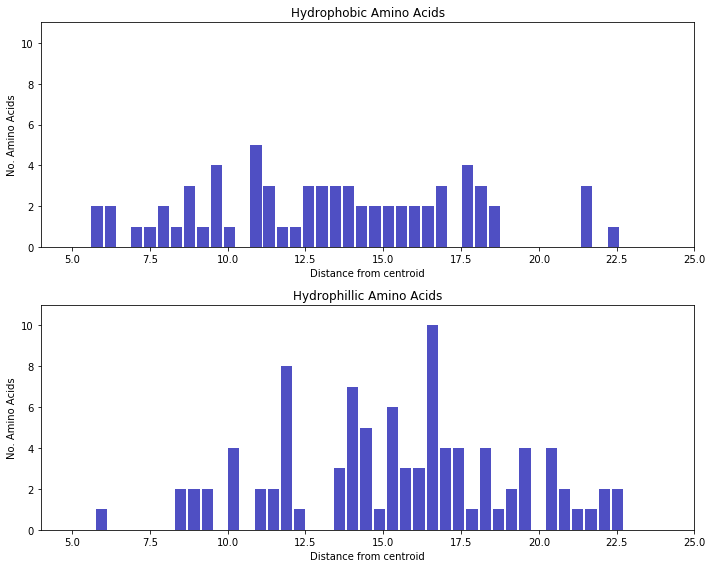

In [10]:
x1 = phob_distances
x2 = phil_distances

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(211)
ax1.hist(x1, bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlim(4, 25)
plt.ylim(0,11)
ax1.set_title('Hydrophobic Amino Acids')
ax1.set_xlabel('Distance from centroid')
ax1.set_ylabel('No. Amino Acids')
extentphob = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('phobic_histogram.png', bbox_inches=extentphob.expanded(1.3, 1.2))

ax2 = fig.add_subplot(212)
ax2.hist(x2, bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlim(4, 25)
plt.ylim(0,11)
ax2.set_title('Hydrophillic Amino Acids')
ax2.set_xlabel('Distance from centroid')
ax2.set_ylabel('No. Amino Acids')
extentphil = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('philic_histogram.png', bbox_inches=extentphil.expanded(1.3, 1.2))


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.savefig('histograms.png')
fig.tight_layout()
plt.show()

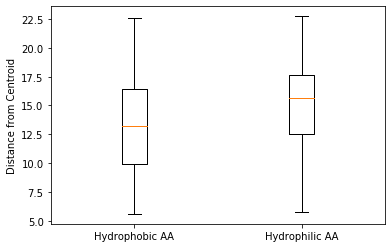

In [11]:
labels = ['Hydrophobic AA', 'Hydrophilic AA']
data = [phob_distances, phil_distances]
fig, ax = plt.subplots()
# ax.set_title('Distance from Centroid')
ax.boxplot(data, labels = labels)
ax.set_ylabel('Distance from Centroid')
plt.savefig('boxplot.png')
plt.show()

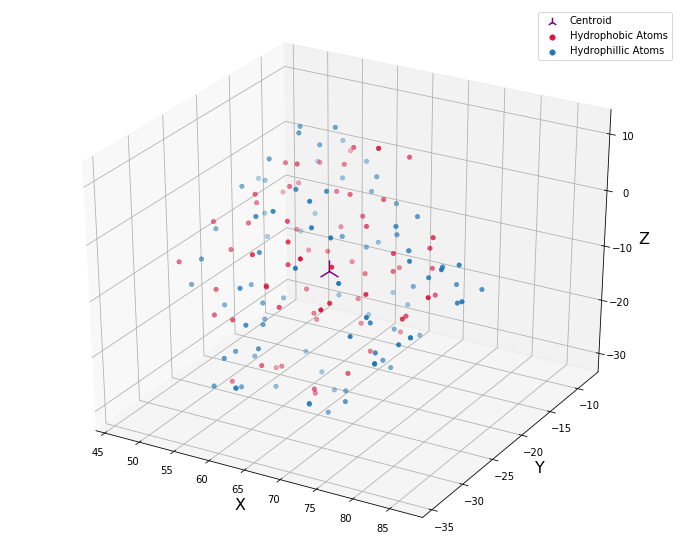

In [12]:
# %matplotlib qt5
phob_coords = get_coordinates(atom_file, 'phobic')
phil_coords = get_coordinates(atom_file, 'philic')
mean = distance_to_centroid(atom_file)[1]

xphob = phob_coords[:,0]
yphob = phob_coords[:,1]
zphob = phob_coords[:,2]

xphil = phil_coords[:,0]
yphil = phil_coords[:,1]
zphil = phil_coords[:,2]

fig = plt.figure(figsize = (12,10))
ax = fig.gca(projection='3d')
ax.scatter(mean[0], mean[1], mean[2], s = 500, marker = '2', color='purple', label='Centroid')
ax.scatter(xphob, yphob, zphob, lw=0.5, color='crimson', label = 'Hydrophobic Atoms')
ax.scatter(xphil, yphil, zphil, lw=0.5, label = 'Hydrophillic Atoms')

ax.set_xlabel("X", fontsize = 16)
ax.set_ylabel("Y", fontsize = 16)
ax.set_zlabel("Z", fontsize = 16)

lgnd = plt.legend( scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [90]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.savefig('3Dscatter.png')
plt.show()

In [13]:
# Generating data for gaussian kernel density plots

nbins = 20

data1 = np.array([xphob, yphob])
k1 = kde.gaussian_kde(data1)
xi1, yi1 = np.mgrid[min(xphil.min(), xphob.min()):max(xphil.max(),xphob.max()):nbins*1j,
                    min(yphob.min(),yphil.min()):max(yphob.max(), yphil.max()):nbins*1j]
zi1 = k1(np.vstack([xi1.flatten(), yi1.flatten()]))

data2 = np.array([xphob, zphob])
k2 = kde.gaussian_kde(data2)
xi2, yi2 = np.mgrid[min(xphil.min(), xphob.min()):max(xphil.max(),xphob.max()):nbins*1j,
                    min(zphob.min(),zphil.min()):max(zphob.max(), zphil.max()):nbins*1j]
zi2 = k2(np.vstack([xi2.flatten(), yi2.flatten()]))

data3 = [yphob, zphob]
k3 = kde.gaussian_kde(data3)
xi3, yi3 = np.mgrid[min(yphil.min(), yphob.min()):max(yphil.max(),yphob.max()):nbins*1j,
                    min(zphob.min(),zphil.min()):max(zphob.max(), zphil.max()):nbins*1j]
zi3 = k3(np.vstack([xi3.flatten(), yi3.flatten()]))

data4 = np.array([xphil, yphil])
k4 = kde.gaussian_kde(data4)
xi4, yi4 = np.mgrid[min(xphil.min(), xphob.min()):max(xphil.max(),xphob.max()):nbins*1j,
                    min(yphob.min(),yphil.min()):max(yphob.max(), yphil.max()):nbins*1j]
zi4 = k4(np.vstack([xi4.flatten(), yi4.flatten()]))

data5 = np.array([xphil, zphil])
k5 = kde.gaussian_kde(data5)
xi5, yi5 = np.mgrid[min(xphil.min(), xphob.min()):max(xphil.max(),xphob.max()):nbins*1j,
                    min(zphob.min(),zphil.min()):max(zphob.max(), zphil.max()):nbins*1j]
zi5 = k5(np.vstack([xi5.flatten(), yi5.flatten()]))


data6 = [yphil, zphil]
k6 = kde.gaussian_kde(data6)
xi6, yi6 = np.mgrid[min(yphil.min(), yphob.min()):max(yphil.max(),yphob.max()):nbins*1j,
                    min(zphob.min(),zphil.min()):max(zphob.max(), zphil.max()):nbins*1j]
zi6 = k6(np.vstack([xi6.flatten(), yi6.flatten()]))

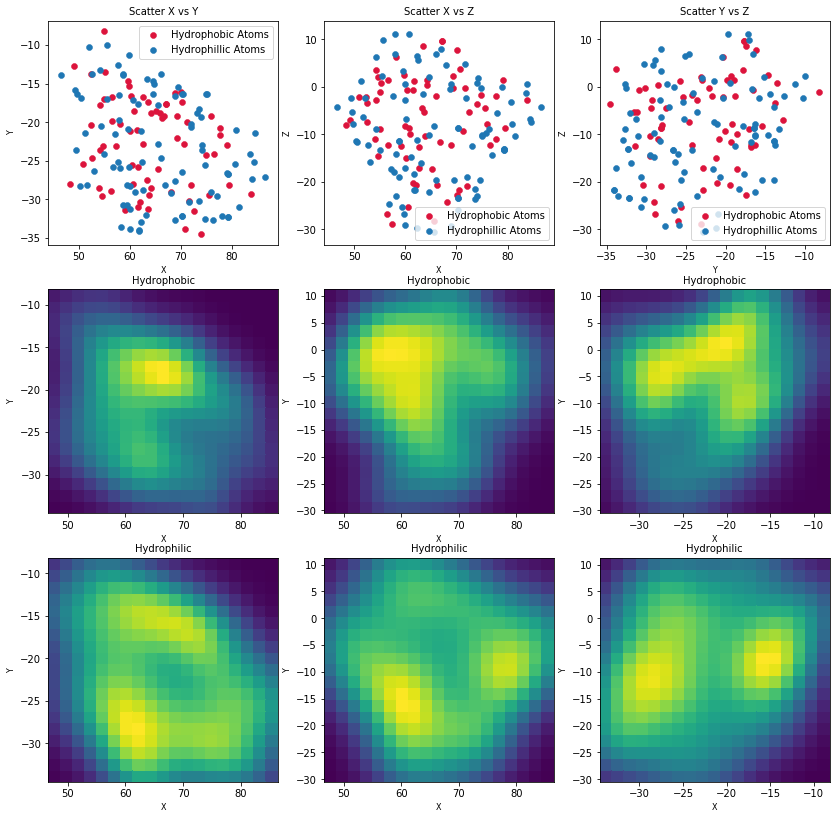

In [14]:
fig = plt.figure(figsize = (14,14))

ax1 = fig.add_subplot(331)
ax1.scatter(xphob, yphob, lw=0.5, color='crimson', label = 'Hydrophobic Atoms')
ax1.scatter(xphil, yphil, lw=0.5, label = 'Hydrophillic Atoms')
ax1.set_xlabel("X", fontsize = 8)
ax1.set_ylabel("Y", fontsize = 8)
ax1.set_title("Scatter X vs Y", fontsize=10)
extent1 = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax1_figure.png', bbox_inches=extent1.expanded(1.3, 1.15))
ax1.legend()

ax2 = fig.add_subplot(332)
ax2.scatter(xphob, zphob, lw=0.5, color='crimson', label = 'Hydrophobic Atoms')
ax2.scatter(xphil, zphil, lw=0.5, label = 'Hydrophillic Atoms')
ax2.set_xlabel("X", fontsize = 8)
ax2.set_ylabel("Z", fontsize = 8)
ax2.set_title("Scatter X vs Z", fontsize=10)
extent2 = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax2_figure.png', bbox_inches=extent2.expanded(1.3, 1.15))
ax2.legend()

ax3 = fig.add_subplot(333)
ax3.scatter(yphob, zphob, lw=0.5, color='crimson', label = 'Hydrophobic Atoms')
ax3.scatter(yphil, zphil, lw=0.5, label = 'Hydrophillic Atoms')
ax3.set_xlabel("Y", fontsize = 8)
ax3.set_ylabel("Z", fontsize = 8)
ax3.set_title("Scatter Y vs Z", fontsize=10)
extent3 = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax3_figure.png', bbox_inches=extent3.expanded(1.3, 1.15))
ax3.legend()

ax4 = fig.add_subplot(334)
ax4.pcolormesh(xi1, yi1, zi1.reshape(xi1.shape), cmap='viridis')
ax4.set_xlabel("X", fontsize = 8)
ax4.set_ylabel("Y", fontsize = 8)
ax4.set_title("Hydrophobic", fontsize=10)
extent4 = ax4.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax4_figure.png', bbox_inches=extent4.expanded(1.3, 1.15))

ax5 = fig.add_subplot(335)
ax5.pcolormesh(xi2, yi2, zi2.reshape(xi2.shape), cmap='viridis')
ax5.set_xlabel("X", fontsize = 8)
ax5.set_ylabel("Y", fontsize = 8)
ax5.set_title("Hydrophobic", fontsize=10)
extent5 = ax5.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax5_figure.png', bbox_inches=extent5.expanded(1.3, 1.15))

ax6 = fig.add_subplot(336)
ax6.pcolormesh(xi3, yi3, zi3.reshape(xi3.shape), cmap='viridis')
ax6.set_xlabel("X", fontsize = 8)
ax6.set_ylabel("Y", fontsize = 8)
ax6.set_title("Hydrophobic", fontsize=10)
extent6 = ax6.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax6_figure.png', bbox_inches=extent6.expanded(1.3, 1.15))

ax7 = fig.add_subplot(337)
ax7.pcolormesh(xi4, yi4, zi4.reshape(xi4.shape), cmap='viridis')
ax7.set_xlabel("X", fontsize = 8)
ax7.set_ylabel("Y", fontsize = 8)
ax7.set_title("Hydrophilic", fontsize=10)
extent7 = ax7.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax7_figure.png', bbox_inches=extent7.expanded(1.3, 1.15))

ax8 = fig.add_subplot(338)
ax8.pcolormesh(xi5, yi5, zi5.reshape(xi5.shape), cmap='viridis')
ax8.set_xlabel("X", fontsize = 8)
ax8.set_ylabel("Y", fontsize = 8)
ax8.set_title("Hydrophilic", fontsize=10)
extent8 = ax8.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax8_figure.png', bbox_inches=extent8.expanded(1.3, 1.15))

ax9 = fig.add_subplot(339)
ax9.pcolormesh(xi6, yi6, zi6.reshape(xi6.shape), cmap='viridis')
ax9.set_xlabel("X", fontsize = 8)
ax9.set_ylabel("Y", fontsize = 8)
ax9.set_title("Hydrophilic", fontsize=10)
extent9 = ax9.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax9_figure.png', bbox_inches=extent9.expanded(1.3, 1.15))

plt.savefig("scatterKDE.png")
plt.show()

In [15]:
atom_file = "atomfile.txt"
hetero_file = "heterofile.txt"

def search_heterogen(filename, hetatom_name):
    coordinates = []
    with open(filename,'r') as infile:
        for line in infile:
            if line[12:16].strip() == hetatom_name:
                coordinates = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                
    return coordinates

search_heterogen(hetero_file, 'FE')

[69.826, -28.42, -11.877]

In [16]:
fe_coords = search_heterogen(hetero_file, 'FE')

def atom_neighbours(filename, input_coords, number):
    
    coordinates = np.array(get_coordinates(filename))             # retrieving coordinates from file
    distances = []
    dist_coords = []
    output = []
    numbers = retrieve(filename, ['serial'])[0]                   # retrieving serial numbers from file
    
    for coordinate in coordinates:                               
        distances.append(np.linalg.norm(input_coords-coordinate)) # calculating distances and appending to list
    
    dist_coords_nums = list(zip(distances, coordinates, numbers)) # zipping distances, coordinates, and serials

    if input_coords in coordinates:
        for i in dist_coords_nums:
            if input_coords in i[1]:                              # removing entry if the input coordinate
                dist_coords_nums.remove(i)                        # is present in the list already
    
    sorted_dist_coords_nums = sorted(dist_coords_nums)            # sorting by distances 
    neighbours = sorted_dist_coords_nums[:number]
    sorted_numbers = [element[2] for element in neighbours]
    
    for element in sorted_numbers:
        with open(filename,'r') as infile:
            for line in infile:
                if (int(line[7:11].strip()) == element):
                    temp = []

                    output_coords = [float(line[30:38]), float(line[38:46]), float(line[46:54])]
                    temp.append(output_coords)

                    output_number = int(line[7:11].strip())
                    temp.append(output_number)

                    output_residue = line[17:20].strip()
                    temp.append(output_residue)
                    
                    output_resseq = line[22:26].strip()
                    temp.append(output_resseq)

                    output.append(temp)
                
    return output

atom_neighbours("atomfile.txt", fe_coords, 5)

[[[63.792, -29.514, -10.362], 571, 'VAL', '69'],
 [[75.875, -29.043, -9.742], 757, 'HIS', '94'],
 [[77.02, -29.553, -14.29], 794, 'HIS', '98'],
 [[72.547, -31.521, -5.296], 729, 'LEU', '90'],
 [[76.607, -24.205, -12.283], 819, 'ILE', '100']]

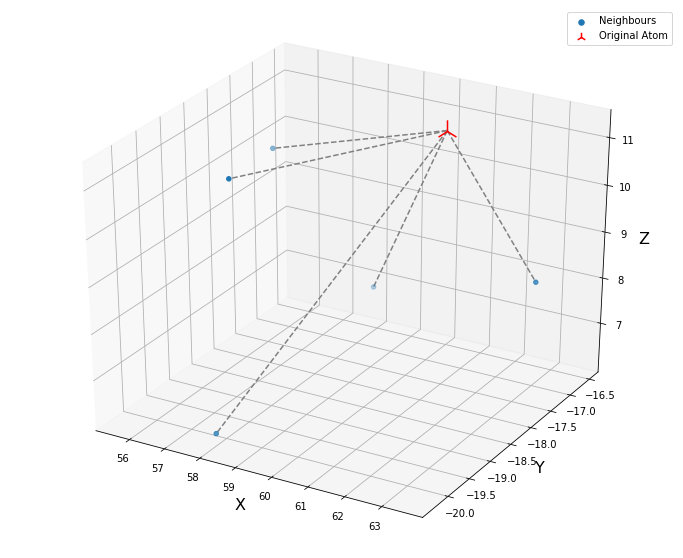

In [17]:
# %matplotlib qt
def plot_neighbours(filename, serial, number):
    
    with open(filename, 'r') as infile:
        for line in infile:
            if (serial == int(line[7:11].strip())):
                coordinate = [float(line[30:38]), float(line[38:46]), float(line[46:54])] 
    
    neighbours = [x[0] for x in atom_neighbours(filename, coordinate, number)]
    
    xs = [x[0] for x in neighbours]
    ys = [x[1] for x in neighbours]
    zs = [x[2] for x in neighbours]
    
    fig = plt.figure(figsize = (12,10))
    ax = fig.gca(projection='3d')
    ax.scatter(xs, ys, zs, marker = 'o', label = 'Neighbours')
    ax.scatter(coordinate[0], coordinate[1], coordinate[2], s=500,color='red', marker = '2', label = 'Original Atom')
    
    for (x, y, z) in zip(xs,ys,zs):
        xline = np.linspace((coordinate)[0], x, 1000)
        yline = np.linspace((coordinate)[1], y, 1000)
        zline = np.linspace((coordinate)[2], z, 1000)
        
        ax.plot3D(xline, yline, zline, color='gray', linestyle='--')
        
    
    ax.set_xlabel("X", fontsize = 16)
    ax.set_ylabel("Y", fontsize = 16)
    ax.set_zlabel("Z", fontsize = 16)

    lgnd = plt.legend( scatterpoints=1, fontsize=10)
    lgnd.legendHandles[0]._sizes = [30]
    lgnd.legendHandles[1]._sizes = [90]
    
    plt.savefig('plotneighbours.png')
    plt.show()

plot_neighbours(atom_file, 29 , 5)